<a href="https://colab.research.google.com/github/AndreiAf02/Job-Satisfaction/blob/main/Job_Satisfaction_AT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 2.0 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=3639c4b3bec153476f2a3b7bd37fc9ee5a5e34f716c8d55a4bba3b4934a84c5e
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built semopy


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import semopy
import math
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

## Data Preprocessing:

In [3]:
# path_to_data = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/02_processed/'
path_to_data2 = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/01_raw-00/'

In [4]:
data_total = pd.read_csv(path_to_data2+ "Final_Dataset.csv", sep=",", header=0)
data_total.columns = data_total.columns.str.replace(".","")
data_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,1,1,1.0,27.0,4.0,NaN,2.0,1.0,4.0,1.0,...,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0
2743,1,1,1.0,80.0,3.0,NaN,1.0,1.0,4.0,6.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
2744,1,1,2.0,27.0,6.0,NaN,3.0,1.0,4.0,3.0,...,2.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,3.0,2.0
2745,1,1,2.0,28.0,4.0,NaN,3.0,1.0,4.0,1.0,...,5.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0,4.0,NaN


In [5]:
print(data_total.columns.tolist())

['Country', 'Version', '1 Gender:', '2 Age (in years):', 'Unnamed: 4', '3 Nationality:', '4 Current marital (partnership) status:', '5 Do you currently care for underage children or dependent relatives?', '6 The type of higher education insitution where you primarily work:', '7 Subject area of the faculty (higher education institution) where you primarily work:', '8 Duration of your current employment contract at the higher education institution where you primarily work:', '9 Extent of employment in higher education (in hours/week, aggregated for all higher education institutions where you work):', '10 Actual average weekly working hours in higher education (in a typical semester week):', 'Effort (less, more, equal)', 'Effort [%]', 'Income CZK', 'Income EURO', 'Euro Adj', 'Salary/hour', 'Salary effort/hour', '12 Do you hold a leadership position at a higher education institution?', '13 How influential are you in helping to shape key academic policies at your institution at the level of

In [6]:
data_at_total = data_total[data_total['Country']==1].reset_index(drop=True)
# data_cz_total = data_total[data_total['Country']==2].reset_index(drop=True)
data_at_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,1,3,1.0,47.0,7.0,Hungary,1.0,2.0,5.0,5.0,...,4.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,3.0
1,1,3,2.0,35.0,NaN,NaN,1.0,2.0,6.0,2.0,...,4.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0
2,1,3,1.0,51.0,7.0,Australian,3.0,1.0,4.0,5.0,...,4.0,2.0,4.0,5.0,2.0,5.0,3.0,4.0,4.0,4.0
3,1,3,1.0,34.0,7.0,Belgian,2.0,1.0,4.0,7.0,...,2.0,4.0,1.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0
4,1,3,2.0,29.0,7.0,Ecuadorian,2.0,1.0,4.0,2.0,...,4.0,4.0,1.0,4.0,4.0,3.0,4.0,4.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,1,1,1.0,27.0,4.0,NaN,2.0,1.0,4.0,1.0,...,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0
1324,1,1,1.0,80.0,3.0,NaN,1.0,1.0,4.0,6.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
1325,1,1,2.0,27.0,6.0,NaN,3.0,1.0,4.0,3.0,...,2.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,3.0,2.0
1326,1,1,2.0,28.0,4.0,NaN,3.0,1.0,4.0,1.0,...,5.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0,4.0,NaN


In [7]:
data_at_job = data_at_total[['2 Age (in years):',
    'AT_15 Your current position at the higher education institution, where you primarily work: ', ## Current Position
    'Salary/hour',
    '8 Duration of your current employment contract at the higher education institution where you primarily work:', ## Contract Duration
    '10 Actual average weekly working hours in higher education (in a typical semester week):', ## Actual Weekly Working Hours
    'Effort [%]', ## Effort = actual hours/contract hours
    '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)', ## Teaching hours
    '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)', ## Research Hours
    '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)', ## Research Admin hours
    '4 Organisational and administrative activities (organising and attending meetings, dealing with tasks and documents not directly related to teaching, research, or externally funded research projects, etc)', ## General Admin hours
    '12 Do you hold a leadership position at a higher education institution?', ## Leadership position
    '13 How influential are you in helping to shape key academic policies at your institution at the level of department or similar unit?', ## Policy Influence
    ## ACADEMIC RESOURCES:
    '1 Facilities and technological equipment (offices, classrooms, laboratories, computers, projectors, teaching software)', ## Academic Resources - FACILITIES
    '2 Research equipment (instruments, tools, materials, software for working with data)', ## Academic Resources - RESEARCH EQUIP
    '3 Availability of scientific literature (access to up-to-date scientific articles and books)', ## Academic Resources - LITERATURE
    '4 Personnel support (support from secretarial, administrative and technical staff, laboratory technicians, etc)', ## Academic Resources - SUPPORT
    '5 Opportunities for personal and professional development (offer and availability of professional courses and internships, opportunities to participate at conferences and other professional events)', ## Academic Resources - PD
    '6 Availability of resources for research funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    '1 At my institution, there is a strong performance orientation',
    ## PERCEIVED AUTONOMY:
    '2 I feel like I can be myself at my job', ## KEEP ORDER
    "3 At work, I often feel like I have to follow other people’s commands", ## TO INVERT
    '4 If I could choose, I would do things at work differently', ## TO INVERT
    '5 The tasks I have to do at work are in line with what I really want to do', ## KEEP ORDER
    '6 I feel free to do my job the way I think it could best be done', ## KEEP ORDER
    '7 In my job, I feel forced to do things I do not want to do ', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    '1  makes sure that the members of staff have good development opportunities', ## KEEP ORDER
    '2  gives high priority to job satisfaction', ## KEEP ORDER
    '3  is good at work planning', ## KEEP ORDER
    '4  is good at solving conflicts ', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    '1 There is a good atmosphere between myself and my colleagues ',
    '2 There is good co-operation between the colleagues at work',
    '3 I feel part of a community at my place of work',
    ## JOB SATISFACTION:
    '1  your work prospects? ',
    '2   the physical working conditions (eg facilities, equipment, physical working environment)?',
    '3  the way your abilities are used?',
    '4  your salary?',
    '5  your job as a whole, everything taken into consideration? '
]]

In [8]:
data_at_job.columns.tolist()

['2 Age (in years):',
 'AT_15 Your current position at the higher education institution, where you primarily work: ',
 'Salary/hour',
 '8 Duration of your current employment contract at the higher education institution where you primarily work:',
 '10 Actual average weekly working hours in higher education (in a typical semester week):',
 'Effort [%]',
 '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)',
 '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)',
 '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)',
 '4 Organisational and administrative activities (organising and attending meetings, deali

In [9]:
data_at_job.columns = ['Age',
    'Current_position', ## Current Position
    'Salary',
    'Contract_duration', ## Contract Duration
    'Actual_hrs', ## Actual Weekly Working Hours
    'Effort', ## Effort = actual hours/contract hours
    'Teaching_hrs', ## Teaching hours
    'Research_hrs', ## Research Hours
    'External_funding_hrs', ## External Research Funding hours
    'Admin_hrs', ## General Admin hours
    'Leadership_position', ## Leadership position
    'Policy_influence', ## Policy Influence
    ## ACADEMIC RESOURCES:
    'Acad_res_facility', ## Academic Resources - FACILITIES
    'Acad_res_equip', ## Academic Resources - RESEARCH EQUIP
    'Acad_res_lit', ## Academic Resources - LITERATURE
    'Acad_res_support', ## Academic Resources - SUPPORT
    'Acad_res_PD', ## Academic Resources - PD
    'Acad_res_funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    'Performance_pressure',
    ## PERCEIVED AUTONOMY:
    'Be_myself', ## KEEP ORDER
    "Follow_commands", ## TO INVERT
    'Do_differently', ## TO INVERT
    'Want_to_do', ## KEEP ORDER
    'Done_best', ## KEEP ORDER
    'Forced_to_do', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    'Development_opportunities', ## KEEP ORDER
    'Prioritizes_satisfaction', ## KEEP ORDER
    'Work_planning', ## KEEP ORDER
    'Solving_conflicts', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    'Good_atmosphere',
    'Good_cooperation',
    'Part_of_community',
    ## JOB SATISFACTION:
    'Work_prospects',
    'Physical_working_conditions',
    'Use_of_abilities',
    'Satisfaction_w_salary',
    'Overall_satisfaction']

In [10]:
data_at_job.columns.tolist()

['Age',
 'Current_position',
 'Salary',
 'Contract_duration',
 'Actual_hrs',
 'Effort',
 'Teaching_hrs',
 'Research_hrs',
 'External_funding_hrs',
 'Admin_hrs',
 'Leadership_position',
 'Policy_influence',
 'Acad_res_facility',
 'Acad_res_equip',
 'Acad_res_lit',
 'Acad_res_support',
 'Acad_res_PD',
 'Acad_res_funding',
 'Performance_pressure',
 'Be_myself',
 'Follow_commands',
 'Do_differently',
 'Want_to_do',
 'Done_best',
 'Forced_to_do',
 'Development_opportunities',
 'Prioritizes_satisfaction',
 'Work_planning',
 'Solving_conflicts',
 'Good_atmosphere',
 'Good_cooperation',
 'Part_of_community',
 'Work_prospects',
 'Physical_working_conditions',
 'Use_of_abilities',
 'Satisfaction_w_salary',
 'Overall_satisfaction']

In [11]:
data_at_job = data_at_job.dropna(subset=['Age', 'Current_position', 'Leadership_position']).reset_index(drop=True)
data_at_job = data_at_job[~(data_at_job == '#VALUE!').any(axis=1)]
for col in data_at_job.columns:
  data_at_job[col] = data_at_job[col].astype(str).str.replace(',', '.').astype(float)
data_at_job.to_csv('data_at_job.csv')
data_at_job

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,47.0,2.0,86.538462,6.0,40.0,100.000000,12.0,6.0,6.0,16.0,...,3.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0
1,35.0,8.0,22.788462,3.0,45.0,112.500000,NaN,35.0,10.0,NaN,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0
2,51.0,13.0,20.192308,3.0,40.0,100.000000,0.0,10.0,10.0,80.0,...,2.0,2.0,5.0,3.0,2.0,4.0,3.0,1.0,1.0,2.0
3,34.0,8.0,17.884615,3.0,50.0,125.000000,15.0,30.0,2.0,5.0,...,4.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0
4,29.0,11.0,26.373626,3.0,35.0,100.000000,1.0,20.0,9.0,5.0,...,4.0,2.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,27.0,9.0,18.907500,3.0,35.0,116.666667,0.0,25.0,1.0,4.0,...,2.0,1.0,3.0,1.0,2.0,4.0,4.0,2.0,1.0,2.0
1300,80.0,13.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0
1301,27.0,9.0,22.061538,3.0,30.0,100.000000,0.0,25.0,0.0,5.0,...,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0
1302,28.0,9.0,13.461538,3.0,42.0,116.666667,2.0,40.0,0.0,0.0,...,1.0,2.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0


In [12]:
np.sort(data_at_job['Current_position'].unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.])

In [13]:
data_at_job

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,47.0,2.0,86.538462,6.0,40.0,100.000000,12.0,6.0,6.0,16.0,...,3.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0
1,35.0,8.0,22.788462,3.0,45.0,112.500000,NaN,35.0,10.0,NaN,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0
2,51.0,13.0,20.192308,3.0,40.0,100.000000,0.0,10.0,10.0,80.0,...,2.0,2.0,5.0,3.0,2.0,4.0,3.0,1.0,1.0,2.0
3,34.0,8.0,17.884615,3.0,50.0,125.000000,15.0,30.0,2.0,5.0,...,4.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0
4,29.0,11.0,26.373626,3.0,35.0,100.000000,1.0,20.0,9.0,5.0,...,4.0,2.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,27.0,9.0,18.907500,3.0,35.0,116.666667,0.0,25.0,1.0,4.0,...,2.0,1.0,3.0,1.0,2.0,4.0,4.0,2.0,1.0,2.0
1300,80.0,13.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0
1301,27.0,9.0,22.061538,3.0,30.0,100.000000,0.0,25.0,0.0,5.0,...,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0
1302,28.0,9.0,13.461538,3.0,42.0,116.666667,2.0,40.0,0.0,0.0,...,1.0,2.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0


In [14]:
## Interpolating the missing answer data using averages from each job position:
data_at_job_interpolated = data_at_job
data_at_job_interpolated.columns

for i in range(len(data_at_job_interpolated.columns)-3):
  for j in np.sort(data_at_job_interpolated['Current_position'].unique()):
    interpolation = data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][data_at_job_interpolated['Current_position']== j].mean()
    print('Interpolated Value:', interpolation)
    data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
    & (data_at_job_interpolated['Current_position']== j)] = interpolation

data_at_job_interpolated.to_csv('data_at_job_interpolated.csv')
data_at_job_interpolated



Interpolated Value: 32.66186321156931
Interpolated Value: 106.43888510797046
Interpolated Value: 51.52034987512487
Interpolated Value: 92.51695900253594
Interpolated Value: 84.30458579881656
Interpolated Value: 49.19045875999001
Interpolated Value: 73.5480698005698
Interpolated Value: 48.21161777089524
Interpolated Value: 33.808428957649944
Interpolated Value: 37.36983237973152
Interpolated Value: 31.84670231424676
Interpolated Value: 42.46080091138762
Interpolated Value: 40.323063787065486
Interpolated Value: 1.4198473282442747
Interpolated Value: 2.4215686274509802
Interpolated Value: 1.4782608695652173
Interpolated Value: 2.0140845070422535
Interpolated Value: 4.064516129032258
Interpolated Value: 1.564102564102564
Interpolated Value: 2.891304347826087
Interpolated Value: 2.5369127516778525
Interpolated Value: 2.7857142857142856
Interpolated Value: 1.7253521126760563
Interpolated Value: 2.259493670886076
Interpolated Value: 2.4
Interpolated Value: 2.5
Interpolated Value: 35.51976284

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 1.1785714285714286
Interpolated Value: 4.405405405405405
Interpolated Value: nan
Interpolated Value: 12.795
Interpolated Value: 12.159090909090908
Interpolated Value: 13.042857142857143
Interpolated Value: 14.116666666666667
Interpolated Value: 12.220512820512822
Interpolated Value: 10.733333333333333
Interpolated Value: 6.72972972972973
Interpolated Value: 5.9363636363636365
Interpolated Value: 7.141726618705036
Interpolated Value: 5.875
Interpolated Value: 3.5606557377049177
Interpolated Value: 9.615384615384615
Interpolated Value: 1.1870229007633588
Interpolated Value: 2.176470588235294
Interpolated Value: 1.6956521739130435
Interpolated Value: 1.3380281690140845
Interpolated Value: 2.032258064516129
Interpolated Value: 2.2564102564102564
Interpolated Value: 1.934782608695652
Interpolated Value: 1.5906040268456376
Interpolated Value: 1.1011904761904763
Interpolated Value: 1.6056338028169015
Interpolated Value: 1.2848101265822784
Interpolated Value: 1.057142857142

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 2.421875
Interpolated Value: 2.357142857142857
Interpolated Value: 2.3076923076923075
Interpolated Value: 2.6222222222222222
Interpolated Value: 2.6054421768707483
Interpolated Value: 2.798780487804878
Interpolated Value: 2.492424242424242
Interpolated Value: 2.816326530612245
Interpolated Value: 2.274193548387097
Interpolated Value: 2.3076923076923075
Interpolated Value: 3.2490421455938696
Interpolated Value: 3.6831683168316833
Interpolated Value: 3.9565217391304346
Interpolated Value: 3.464788732394366
Interpolated Value: 3.838709677419355
Interpolated Value: 3.7948717948717947
Interpolated Value: 3.782608695652174
Interpolated Value: 3.651006711409396
Interpolated Value: 3.738095238095238
Interpolated Value: 3.563380281690141
Interpolated Value: 3.6582278481012658
Interpolated Value: 3.4714285714285715
Interpolated Value: 3.1904761904761907
Interpolated Value: 3.478927203065134
Interpolated Value: 3.843137254901961
Interpolated Value: 3.391304347826087
Interpolat

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 3.8309859154929575
Interpolated Value: 4.066666666666666
Interpolated Value: 3.58974358974359
Interpolated Value: 3.5
Interpolated Value: 3.675675675675676
Interpolated Value: 3.5833333333333335
Interpolated Value: 3.8309859154929575
Interpolated Value: 3.7278481012658227
Interpolated Value: 4.101449275362318
Interpolated Value: 3.738095238095238
Interpolated Value: 2.5593869731800765
Interpolated Value: 2.5980392156862746
Interpolated Value: 2.739130434782609
Interpolated Value: 2.8309859154929575
Interpolated Value: 2.7096774193548385
Interpolated Value: 2.9743589743589745
Interpolated Value: 2.869565217391304
Interpolated Value: 2.597315436241611
Interpolated Value: 2.746987951807229
Interpolated Value: 2.4893617021276597
Interpolated Value: 2.4746835443037973
Interpolated Value: 2.1159420289855073
Interpolated Value: 2.4523809523809526
Interpolated Value: 3.436293436293436
Interpolated Value: 3.5
Interpolated Value: 3.608695652173913
Interpolated Value: 3.471428

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 3.607594936708861
Interpolated Value: 3.5522388059701493
Interpolated Value: 3.5238095238095237
Interpolated Value: 3.1003861003861
Interpolated Value: 3.0729166666666665
Interpolated Value: 2.9545454545454546
Interpolated Value: 3.63768115942029
Interpolated Value: 3.2758620689655173
Interpolated Value: 3.054054054054054
Interpolated Value: 3.0681818181818183
Interpolated Value: 2.910344827586207
Interpolated Value: 2.860606060606061
Interpolated Value: 2.7681159420289854
Interpolated Value: 3.159235668789809
Interpolated Value: 3.515151515151515
Interpolated Value: 3.0476190476190474
Interpolated Value: 3.123076923076923
Interpolated Value: 3.1122448979591835
Interpolated Value: 3.1818181818181817
Interpolated Value: 3.5285714285714285
Interpolated Value: 3.2666666666666666
Interpolated Value: 3.210526315789474


/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 2.7906976744186047
Interpolated Value: 2.952054794520548
Interpolated Value: 2.9938650306748467
Interpolated Value: 2.8550724637681157
Interpolated Value: 3.3974358974358974
Interpolated Value: 3.4615384615384617
Interpolated Value: 3.4761904761904763
Interpolated Value: 4.3396946564885495
Interpolated Value: 4.1568627450980395
Interpolated Value: 4.3478260869565215
Interpolated Value: 4.295774647887324
Interpolated Value: 4.096774193548387
Interpolated Value: 4.358974358974359
Interpolated Value: 4.1521739130434785
Interpolated Value: 4.375838926174497
Interpolated Value: 4.279761904761905
Interpolated Value: 4.179856115107913
Interpolated Value: 4.4113924050632916
Interpolated Value: 4.264705882352941
Interpolated Value: 4.463414634146342
Interpolated Value: 4.221374045801527
Interpolated Value: 3.9306930693069306
Interpolated Value: 4.260869565217392
Interpolated Value: 3.9295774647887325
Interpolated Value: 3.903225806451613
Interpolated Value: 3.948717948717949

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 2.4345238095238093
Interpolated Value: 2.8309859154929575
Interpolated Value: 2.6582278481012658
Interpolated Value: 2.742857142857143
Interpolated Value: 2.5714285714285716
Interpolated Value: 3.6755725190839694
Interpolated Value: 4.078431372549019
Interpolated Value: 3.9545454545454546
Interpolated Value: 3.3661971830985915
Interpolated Value: 3.935483870967742
Interpolated Value: 3.8461538461538463
Interpolated Value: 3.9130434782608696
Interpolated Value: 3.8445945945945947
Interpolated Value: 3.658682634730539
Interpolated Value: 3.676056338028169
Interpolated Value: 3.4551282051282053
Interpolated Value: 3.5
Interpolated Value: 3.7142857142857144
Interpolated Value: 3.3038461538461537
Interpolated Value: 3.784313725490196
Interpolated Value: 3.391304347826087
Interpolated Value: 3.5492957746478875
Interpolated Value: 3.3870967741935485
Interpolated Value: 3.358974358974359
Interpolated Value: 3.1555555555555554
Interpolated Value: 3.523489932885906
Interpolat

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,47.0,2.0,86.538462,6.0,40.000000,100.000000,12.000000,6.0000,6.000000,16.000000,...,3.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0
1,35.0,8.0,22.788462,3.0,45.000000,112.500000,8.787162,35.0000,10.000000,6.729730,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0
2,51.0,13.0,20.192308,3.0,40.000000,100.000000,0.000000,10.0000,10.000000,80.000000,...,2.0,2.0,5.0,3.0,2.0,4.0,3.0,1.0,1.0,2.0
3,34.0,8.0,17.884615,3.0,50.000000,125.000000,15.000000,30.0000,2.000000,5.000000,...,4.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0
4,29.0,11.0,26.373626,3.0,35.000000,100.000000,1.000000,20.0000,9.000000,5.000000,...,4.0,2.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,27.0,9.0,18.907500,3.0,35.000000,116.666667,0.000000,25.0000,1.000000,4.000000,...,2.0,1.0,3.0,1.0,2.0,4.0,4.0,2.0,1.0,2.0
1300,80.0,13.0,40.323064,6.0,32.128205,114.749140,7.837500,12.3375,4.405405,9.615385,...,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0
1301,27.0,9.0,22.061538,3.0,30.000000,100.000000,0.000000,25.0000,0.000000,5.000000,...,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0
1302,28.0,9.0,13.461538,3.0,42.000000,116.666667,2.000000,40.0000,0.000000,0.000000,...,1.0,2.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0


In [15]:
## PERCEIVED AUTONOMY:
inversion_list = ['Follow_commands', ## TO INVERT
                  'Do_differently', ## TO INVERT
                  'Forced_to_do'] ## TO INVERT

data_at_job_w_inversion = data_at_job_interpolated


for col in inversion_list:
  print('Before:', col, ":", np.sort(data_at_job_w_inversion[col].unique()))
  data_at_job_w_inversion[col] = max(data_at_job_w_inversion[col])+1 - data_at_job_w_inversion[col]
  print(col, ":", np.sort(data_at_job_w_inversion[col].unique()))

data_at_job_w_inversion.to_csv('data_at_job_w_inversion.csv')
data_at_job_w_inversion



Before: Follow_commands : [1.         2.         2.23188406 2.73333333 3.         4.
 5.        ]
Follow_commands : [1.         2.         3.         3.26666667 3.76811594 4.
 5.        ]
Before: Do_differently : [1.         2.         2.75362319 3.         3.27586207 3.32857143
 3.41134752 3.57777778 4.         5.        ]
Do_differently : [1.         2.         2.42222222 2.58865248 2.67142857 2.72413793
 3.         3.24637681 4.         5.        ]
Before: Forced_to_do : [1.         2.         2.11594203 2.4893617  2.55938697 2.74698795
 3.         4.         5.        ]
Forced_to_do : [1.         2.         3.         3.25301205 3.44061303 3.5106383
 3.88405797 4.         5.        ]


,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,47.0,2.0,86.538462,6.0,40.000000,100.000000,12.000000,6.0000,6.000000,16.000000,...,3.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0
1,35.0,8.0,22.788462,3.0,45.000000,112.500000,8.787162,35.0000,10.000000,6.729730,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0
2,51.0,13.0,20.192308,3.0,40.000000,100.000000,0.000000,10.0000,10.000000,80.000000,...,2.0,2.0,5.0,3.0,2.0,4.0,3.0,1.0,1.0,2.0
3,34.0,8.0,17.884615,3.0,50.000000,125.000000,15.000000,30.0000,2.000000,5.000000,...,4.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0
4,29.0,11.0,26.373626,3.0,35.000000,100.000000,1.000000,20.0000,9.000000,5.000000,...,4.0,2.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,27.0,9.0,18.907500,3.0,35.000000,116.666667,0.000000,25.0000,1.000000,4.000000,...,2.0,1.0,3.0,1.0,2.0,4.0,4.0,2.0,1.0,2.0
1300,80.0,13.0,40.323064,6.0,32.128205,114.749140,7.837500,12.3375,4.405405,9.615385,...,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0
1301,27.0,9.0,22.061538,3.0,30.000000,100.000000,0.000000,25.0000,0.000000,5.000000,...,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0
1302,28.0,9.0,13.461538,3.0,42.000000,116.666667,2.000000,40.0000,0.000000,0.000000,...,1.0,2.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0


In [16]:
data_at_formatted = data_at_job_w_inversion

data_at_formatted = data_at_formatted.dropna(subset = ['Overall_satisfaction']).reset_index(drop=True)


## Calculating percentage hours for teaching and research:
data_at_formatted['Teaching_percent'] = data_at_formatted['Teaching_hrs']/data_at_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_at_formatted['Research_percent'] = data_at_formatted['Research_hrs']/data_at_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_at_formatted = data_at_formatted.drop(['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs'], axis=1)


## Calculating average score for Academic Resources:
data_at_formatted['Academic_Resources'] = data_at_formatted[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                                                             'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                        'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding'], axis=1)


## Calculating average score for Perceived Autonomy:
data_at_formatted['Perceived_Autonomy'] = data_at_formatted[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Be_myself', "Follow_commands", 'Do_differently',
                        'Want_to_do', 'Done_best', 'Forced_to_do'], axis=1)


## Calculating average score for Leadership quality:
data_at_formatted['Leadership_quality'] = data_at_formatted[['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts'],axis=1)


## Calculating average score for sense of community:
data_at_formatted['Sense_of_community'] = data_at_formatted[['Good_atmosphere', 'Good_cooperation',
                                                             'Part_of_community']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Good_atmosphere', 'Good_cooperation', 'Part_of_community'], axis=1)

## Calculating average score for job satisfaction:
data_at_formatted['Job_satisfaction'] = data_at_formatted[['Work_prospects', 'Physical_working_conditions',
                                                           'Use_of_abilities', 'Satisfaction_w_salary',
                                                           'Overall_satisfaction']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Work_prospects', 'Physical_working_conditions',
                        'Use_of_abilities', 'Satisfaction_w_salary',
                        'Overall_satisfaction'],axis=1)


data_at_formatted.to_csv('data_at_formatted.csv')
print(data_at_formatted.columns.tolist())

['Age', 'Current_position', 'Salary', 'Contract_duration', 'Actual_hrs', 'Effort', 'Leadership_position', 'Policy_influence', 'Performance_pressure', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Leadership_quality', 'Sense_of_community', 'Job_satisfaction']


In [17]:
data_at_formatted

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Leadership_position,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Job_satisfaction
0,47.0,2.0,86.538462,6.0,40.000000,100.000000,1.0,4.0,4.0,30.000000,15.000000,4.833333,4.333333,3.00,5.000000,4.8
1,35.0,8.0,22.788462,3.0,45.000000,112.500000,1.0,1.0,3.0,14.520181,57.835092,3.333333,3.333333,4.00,3.333333,3.4
2,51.0,13.0,20.192308,3.0,40.000000,100.000000,3.0,2.0,1.0,0.000000,10.000000,1.500000,2.166667,2.75,3.333333,2.2
3,34.0,8.0,17.884615,3.0,50.000000,125.000000,1.0,3.0,4.0,28.846154,57.692308,3.500000,3.833333,4.00,4.000000,3.8
4,29.0,11.0,26.373626,3.0,35.000000,100.000000,1.0,1.0,4.0,2.857143,57.142857,3.500000,3.166667,2.75,3.333333,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,27.0,9.0,18.907500,3.0,35.000000,116.666667,1.0,2.0,5.0,0.000000,83.333333,4.333333,1.666667,1.75,2.000000,2.6
1298,80.0,13.0,40.323064,6.0,32.128205,114.749140,2.0,4.0,4.0,22.919488,36.079003,3.000000,4.000000,3.50,3.000000,3.6
1299,27.0,9.0,22.061538,3.0,30.000000,100.000000,1.0,1.0,3.0,0.000000,83.333333,3.500000,4.166667,3.75,4.333333,3.0
1300,28.0,9.0,13.461538,3.0,42.000000,116.666667,4.0,1.0,5.0,4.761905,95.238095,2.333333,1.500000,1.50,3.000000,1.6


In [18]:
## Taking only academic positions:

data_at_formatted_academic = data_at_formatted[~data_at_formatted['Current_position'].isin([1., 13.])]

np.sort(data_at_formatted_academic['Current_position'].unique())

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

**Contract duration has 7 values, but only 6 possible responses. To remove the "Other" and leave only 1-5?**

**Similarly, Leadership position has only 3 possible responses, but 4 values. To remove 4 and leave only 1-3?**

In [19]:
np.sort(data_at_formatted_academic['Contract_duration'].unique())
data_at_formatted_academic['Contract_duration'].value_counts()

,count
Contract_duration,
1.0,369
3.0,307
2.0,210
6.0,86
4.0,14
7.0,8
5.0,4


In [20]:
data_at_formatted_academic['Leadership_position'].value_counts()

,count
Leadership_position,
1.0,679
2.0,149
3.0,135
4.0,35


In [21]:
## Cleaning up the outlier values in Contract Duration and Leadership position prior to creating dummy variables:
data_at_formatted_academic = data_at_formatted_academic[data_at_formatted_academic['Contract_duration']<6].reset_index(drop=True)
data_at_formatted_academic = data_at_formatted_academic[data_at_formatted_academic['Leadership_position']<4].reset_index(drop=True)

data_at_formatted_academic['Contract_duration'].value_counts()

,count
Contract_duration,
1.0,344
3.0,305
2.0,207
4.0,14
5.0,4


In [22]:
data_at_formatted_academic['Leadership_position'].value_counts()

,count
Leadership_position,
1.0,637
3.0,120
2.0,117


In [23]:
data_at_formatted_academic.to_csv('data_at_formatted_academic.csv')
data_at_formatted_academic

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Leadership_position,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Job_satisfaction
0,35.0,8.0,22.788462,3.0,45.0,112.500000,1.0,1.0,3.0,14.520181,57.835092,3.333333,3.333333,4.00,3.333333,3.400000
1,34.0,8.0,17.884615,3.0,50.0,125.000000,1.0,3.0,4.0,28.846154,57.692308,3.500000,3.833333,4.00,4.000000,3.800000
2,29.0,11.0,26.373626,3.0,35.0,100.000000,1.0,1.0,4.0,2.857143,57.142857,3.500000,3.166667,2.75,3.333333,2.800000
3,56.0,12.0,6.923077,1.0,40.0,100.000000,1.0,4.0,4.0,28.571429,47.619048,3.666667,4.500000,4.75,5.000000,3.255072
4,36.0,8.0,48.211618,3.0,40.0,100.000000,1.0,2.0,5.0,15.094340,56.603774,3.666667,3.166667,3.50,3.000000,2.368919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,48.0,11.0,31.846702,1.0,23.0,100.000000,1.0,1.0,4.0,9.491973,56.926414,3.666667,2.333333,2.00,2.000000,3.400000
870,40.0,11.0,25.961538,1.0,40.0,100.000000,1.0,1.0,2.0,38.223906,38.223906,2.333333,4.833333,5.00,5.000000,3.800000
871,27.0,9.0,18.907500,3.0,35.0,116.666667,1.0,2.0,5.0,0.000000,83.333333,4.333333,1.666667,1.75,2.000000,2.600000
872,27.0,9.0,22.061538,3.0,30.0,100.000000,1.0,1.0,3.0,0.000000,83.333333,3.500000,4.166667,3.75,4.333333,3.000000


In [24]:
## Creating dummy variables for the categorical variables Current Position, Contract Duration, and Leadership Position:

data_at_formatted_academic_w_dummies = pd.get_dummies(data_at_formatted_academic, columns = ['Current_position', 'Contract_duration', 'Leadership_position'], drop_first=True)

data_at_formatted_academic_w_dummies = data_at_formatted_academic_w_dummies.dropna().reset_index(drop=True)

data_at_formatted_academic_w_dummies = data_at_formatted_academic_w_dummies.astype(float)

## Calculating the interaction terms for Age moderator:
for col in data_at_formatted_academic_w_dummies.columns:
  data_at_formatted_academic_w_dummies[col+'_mod_Age'] = data_at_formatted_academic_w_dummies[col] * data_at_formatted_academic_w_dummies['Age']

data_at_formatted_academic_w_dummies = data_at_formatted_academic_w_dummies.drop(['Age_mod_Age'], axis=1)

data_at_formatted_academic_w_dummies.to_csv('data_at_formatted_academic_w_dummies.csv')

print(data_at_formatted_academic_w_dummies.columns.tolist())
print(np.shape(data_at_formatted_academic_w_dummies))

['Age', 'Salary', 'Actual_hrs', 'Effort', 'Policy_influence', 'Performance_pressure', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Leadership_quality', 'Sense_of_community', 'Job_satisfaction', 'Current_position_3.0', 'Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0', 'Current_position_7.0', 'Current_position_8.0', 'Current_position_9.0', 'Current_position_10.0', 'Current_position_11.0', 'Current_position_12.0', 'Contract_duration_2.0', 'Contract_duration_3.0', 'Contract_duration_4.0', 'Contract_duration_5.0', 'Leadership_position_2.0', 'Leadership_position_3.0', 'Salary_mod_Age', 'Actual_hrs_mod_Age', 'Effort_mod_Age', 'Policy_influence_mod_Age', 'Performance_pressure_mod_Age', 'Teaching_percent_mod_Age', 'Research_percent_mod_Age', 'Academic_Resources_mod_Age', 'Perceived_Autonomy_mod_Age', 'Leadership_quality_mod_Age', 'Sense_of_community_mod_Age', 'Job_satisfaction_mod_Age', 'Current_position_3.0_mod_Age', 'Current_positi

##Correlations and VIF Multicollinearity:

<Axes: >

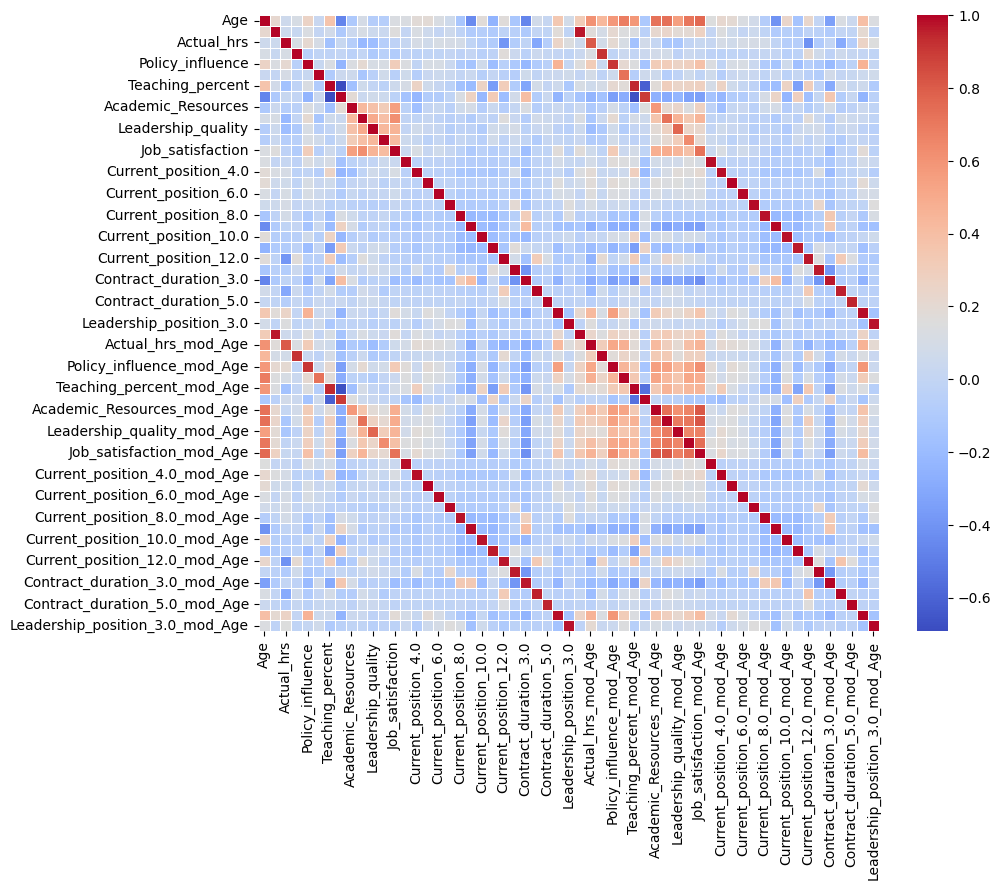

In [25]:
correlations = data_at_formatted_academic_w_dummies.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)

In [26]:
## Performing Variance Inflation Factor (VIF) analysis of the dataset:

Current_position_dummy_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]
## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'mod_Age' in col]
## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_at_formatted_academic_w_dummies.columns if col not in ['Job_satisfaction']+['Age']+Current_position_dummy_cols+Moderation_cols]

for cols in [Current_position_dummy_cols, Working_condition_cols, Moderation_cols]:
  if cols == Current_position_dummy_cols:
    print('Current Position:')
  elif cols == Working_condition_cols:
    print('Working Conditions:')
  elif cols == Moderation_cols:
    print('Age-Moderated Working Conditions:')
  X = data_at_formatted_academic_w_dummies[cols].copy()
  X_const = add_constant(X)
  vif_data = pd.DataFrame()
  vif_data['Variable'] = X_const.columns
  vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

  print(vif_data)
  print('----------------------------------------')

Current Position:
                 Variable        VIF
0                   const  13.242424
1    Current_position_3.0   1.286509
2    Current_position_4.0   1.766088
3    Current_position_5.0   1.165592
4    Current_position_6.0   1.404618
5    Current_position_7.0   1.417568
6    Current_position_8.0   2.684471
7    Current_position_9.0   2.822602
8   Current_position_10.0   2.489703
9   Current_position_11.0   2.737310
10  Current_position_12.0   1.848970
----------------------------------------
Working Conditions:
                   Variable        VIF
0                     const  83.337963
1                    Salary   1.056550
2                Actual_hrs   1.393200
3                    Effort   1.047420
4          Policy_influence   1.483582
5      Performance_pressure   1.077298
6          Teaching_percent   2.234597
7          Research_percent   2.372089
8        Academic_Resources   1.423135
9        Perceived_Autonomy   1.732937
10       Leadership_quality   1.561568
11       

## Calculating Cronbach's Alpha for the combined factors:

In [27]:
def Cronbach_alpha_func(data, label):
  col_nr = data.shape[1]

  item_variances = np.var(data, axis=0, ddof=1)
  total_var = np.var(np.sum(data, axis=1), ddof=1)
  alpha_cronbach = (col_nr/(col_nr-1))*(1-(np.sum(item_variances)/total_var))

  print(f'{label} Cronbach Alpha:', alpha_cronbach)
  return alpha_cronbach

In [28]:
## Academic Resources:

data_at_for_alpha_academic = data_at_job_w_inversion[(~data_at_job_w_inversion['Current_position'].isin([1., 13.])) &
                                                     (data_at_job_w_inversion['Contract_duration']<6) &
                                                     (data_at_job_w_inversion['Leadership_position']<4)].dropna()

print(len(data_at_for_alpha_academic))

academic_resources_for_alpha = np.asarray(data_at_for_alpha_academic[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                         'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']])

perceived_autonomy_for_alpha = np.asarray(data_at_for_alpha_academic[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']])

leadership_quality_for_alpha = np.asarray(data_at_for_alpha_academic[['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts']])

sense_of_community_for_alpha = np.asarray(data_at_for_alpha_academic[['Good_atmosphere', 'Good_cooperation', 'Part_of_community']])

job_satisfaction_for_alpha = np.asarray(data_at_for_alpha_academic[['Work_prospects', 'Physical_working_conditions',
                                                                      'Use_of_abilities', 'Satisfaction_w_salary',
                                                                      'Overall_satisfaction']])


acad_res_cron_alpha = Cronbach_alpha_func(academic_resources_for_alpha, 'Academic Resources')
perc_auton_cron_alpha = Cronbach_alpha_func(perceived_autonomy_for_alpha, 'Perceived Autonomy')
lead_qual_cron_alpha = Cronbach_alpha_func(leadership_quality_for_alpha, 'Leadership Quality')
sens_comm_cron_alpha = Cronbach_alpha_func(sense_of_community_for_alpha, 'Sense of Community')
print('---------------------')
job_sat_cron_alpha = Cronbach_alpha_func(job_satisfaction_for_alpha, 'Job Satisfaction')





874
Academic Resources Cronbach Alpha: 0.7635545350612548
Perceived Autonomy Cronbach Alpha: 0.8657873718566688
Leadership Quality Cronbach Alpha: 0.8952775206192825
Sense of Community Cronbach Alpha: 0.8656061362992502
---------------------
Job Satisfaction Cronbach Alpha: 0.7598127236689847


## Structural Equation Modelling:

We study the relationship between academic position and job satisfaction, mediated by working conditions and moderated by age.

In [29]:
data_at_formatted_academic_w_dummies['Contract_duration_5.0'].value_counts()

,count
Contract_duration_5.0,
0.0,870
1.0,4


In [30]:
## Taking the response variable (Job satisfaction), the moderator variable (Age), and the predictor variable(s) (Current Position):
Job_satisfaction_col = ['Job_satisfaction']
Age_col = ['Age']
Current_position_dummy_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]

## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'mod_Age' in col]

## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_at_formatted_academic_w_dummies.columns if col not in Job_satisfaction_col+Age_col+Current_position_dummy_cols+Moderation_cols]

Working_condition_cols

['Salary',
 'Actual_hrs',
 'Effort',
 'Policy_influence',
 'Performance_pressure',
 'Teaching_percent',
 'Research_percent',
 'Academic_Resources',
 'Perceived_Autonomy',
 'Leadership_quality',
 'Sense_of_community',
 'Contract_duration_2.0',
 'Contract_duration_3.0',
 'Contract_duration_4.0',
 'Contract_duration_5.0',
 'Leadership_position_2.0',
 'Leadership_position_3.0']

In [31]:
Current_position_dummy_cols

['Current_position_3.0',
 'Current_position_4.0',
 'Current_position_5.0',
 'Current_position_6.0',
 'Current_position_7.0',
 'Current_position_8.0',
 'Current_position_9.0',
 'Current_position_10.0',
 'Current_position_11.0',
 'Current_position_12.0']

In [32]:
Moderation_cols

['Salary_mod_Age',
 'Actual_hrs_mod_Age',
 'Effort_mod_Age',
 'Policy_influence_mod_Age',
 'Performance_pressure_mod_Age',
 'Teaching_percent_mod_Age',
 'Research_percent_mod_Age',
 'Academic_Resources_mod_Age',
 'Perceived_Autonomy_mod_Age',
 'Leadership_quality_mod_Age',
 'Sense_of_community_mod_Age',
 'Job_satisfaction_mod_Age',
 'Current_position_3.0_mod_Age',
 'Current_position_4.0_mod_Age',
 'Current_position_5.0_mod_Age',
 'Current_position_6.0_mod_Age',
 'Current_position_7.0_mod_Age',
 'Current_position_8.0_mod_Age',
 'Current_position_9.0_mod_Age',
 'Current_position_10.0_mod_Age',
 'Current_position_11.0_mod_Age',
 'Current_position_12.0_mod_Age',
 'Contract_duration_2.0_mod_Age',
 'Contract_duration_3.0_mod_Age',
 'Contract_duration_4.0_mod_Age',
 'Contract_duration_5.0_mod_Age',
 'Leadership_position_2.0_mod_Age',
 'Leadership_position_3.0_mod_Age']

In [44]:
Current_position_factors = " + ".join(Current_position_dummy_cols)
Working_condition_factors = " + ".join(Working_condition_cols)
Moderation_factors = " + ".join(Moderation_cols)

path_no_mod = f"""
Salary ~ {Current_position_factors}
Actual_hrs ~ {Current_position_factors}
Effort ~ {Current_position_factors}
Policy_influence ~ {Current_position_factors}
Performance_pressure ~ {Current_position_factors}
Teaching_percent ~ {Current_position_factors}
Research_percent ~ {Current_position_factors}
Academic_Resources ~ {Current_position_factors}
Perceived_Autonomy ~ {Current_position_factors}
Leadership_quality ~ {Current_position_factors}
Sense_of_community ~ {Current_position_factors}
Contract_duration_2.0 ~ {Current_position_factors}
Contract_duration_3.0 ~ {Current_position_factors}
Contract_duration_4.0 ~ {Current_position_factors}
Leadership_position_2.0 ~ {Current_position_factors}
Leadership_position_3.0 ~ {Current_position_factors}
Job_satisfaction ~ {Working_condition_factors} + {Current_position_factors}
"""



path = f"""
Salary ~ {Current_position_factors}
Actual_hrs ~ {Current_position_factors}
Effort ~ {Current_position_factors}
Policy_influence ~ {Current_position_factors}
Performance_pressure ~ {Current_position_factors}
Teaching_percent ~ {Current_position_factors}
Research_percent ~ {Current_position_factors}
Academic_Resources ~ {Current_position_factors}
Perceived_Autonomy ~ {Current_position_factors}
Leadership_quality ~ {Current_position_factors}
Sense_of_community ~ {Current_position_factors}
Contract_duration_2.0 ~ {Current_position_factors}
Contract_duration_3.0 ~ {Current_position_factors}
Contract_duration_4.0 ~ {Current_position_factors}
Leadership_position_2.0 ~ {Current_position_factors}
Leadership_position_3.0 ~ {Current_position_factors}
Job_satisfaction ~ {Working_condition_factors} + {Current_position_factors} + {Moderation_factors}
"""


In [34]:
model = semopy.Model(path)
result = model.fit(data_at_formatted_academic_w_dummies)
print(result)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 47.746
Number of iterations: 810
Params: -93.433 -45.496 -15.612 -64.336 -66.152 -87.416 -104.735 -97.816 -101.956 -90.516 -8.130 -4.728 -2.245 -2.272 -2.646 -6.987 -9.853 -11.726 -11.974 -26.914 -16.407 -14.019 -5.965 -10.201 4.710 -5.103 1.553 -10.857 -5.230 29.569 -0.396 -1.382 -0.348 -0.715 -1.155 -1.593 -1.674 -1.166 -1.780 -1.561 0.373 -0.333 0.194 0.211 0.148 -0.076 0.020 -0.222 -0.062 -0.238 10.121 18.025 11.886 -4.200 -10.261 -15.034 -16.332 10.088 -25.767 21.546 -11.471 -8.748 -4.808 1.485 11.432 21.040 28.597 -0.372 32.460 -3.287 -0.301 -0.630 -0.097 -0.057 -0.303 -0.039 0.003 -0.273 -0.093 -0.329 -0.352 -0.346 -0.144 -0.398 -0.529 -0.347 -0.462 -0.286 -0.353 0.182 0.105 0.432 0.433 0.249 -0.218 0.079 0.070 -0.103 0.315 0.401 0.357 0.139 -0.235 0.127 -0.187 0.076 0.022 -0.078 0.209 -0.007 -0.091 0.282 -0.091 -0.024 0.587 0.086 0.130 -0.012 0.301 0.

In [35]:
## Evaluating the model fit:
if 'Optimization terminated successfully' in result.message:
    print('Optimization Successful')
    print('EVALUATION:')
    fit_evaluation = semopy.calc_stats(model)
    print(fit_evaluation.T)
    print('-'*25)

Optimization Successful
EVALUATION:
                      Value
DoF             1364.000000
DoF Baseline    1579.000000
chi2           41730.332949
chi2 p-value       0.000000
chi2 Baseline  93183.310114
CFI                0.559340
GFI                0.552169
AGFI               0.481580
NFI                0.552169
TLI                0.489881
RMSEA              0.184118
AIC              368.507247
BIC             1475.861894
LogLik            47.746376
-------------------------


In [36]:
ins = model.inspect()
print(ins)
ins.to_csv('Model Parameter Values.csv')

                   lval  op                  rval     Estimate    Std. Err  \
0                Salary   ~  Current_position_3.0   -93.432904   18.664192   
1                Salary   ~  Current_position_4.0   -45.496496   13.347140   
2                Salary   ~  Current_position_5.0   -15.611569   23.378459   
3                Salary   ~  Current_position_6.0   -64.336458   16.403412   
4                Salary   ~  Current_position_7.0   -66.152067   16.220500   
..                  ...  ..                   ...          ...         ...   
227    Research_percent  ~~      Research_percent   425.523411   20.355545   
228              Salary  ~~                Salary  5549.608520  265.473778   
229  Sense_of_community  ~~    Sense_of_community     0.907710    0.043422   
230    Teaching_percent  ~~      Teaching_percent   411.566773   19.687909   
231    Job_satisfaction  ~~      Job_satisfaction     0.016595    0.000794   

       z-value       p-value  
0    -5.005998  5.557336e-07  
1

In [37]:
ins[ins['p-value']<0.05]

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Salary,~,Current_position_3.0,-93.432904,18.664192,-5.005998,5.557336e-07
1,Salary,~,Current_position_4.0,-45.496496,13.347140,-3.408708,6.527142e-04
3,Salary,~,Current_position_6.0,-64.336458,16.403412,-3.922139,8.776643e-05
4,Salary,~,Current_position_7.0,-66.152067,16.220500,-4.078300,4.536616e-05
5,Salary,~,Current_position_8.0,-87.416160,11.037999,-7.919566,2.442491e-15
...,...,...,...,...,...,...,...
227,Research_percent,~~,Research_percent,425.523411,20.355545,20.904545,0.000000e+00
228,Salary,~~,Salary,5549.608520,265.473778,20.904545,0.000000e+00
229,Sense_of_community,~~,Sense_of_community,0.907710,0.043422,20.904545,0.000000e+00
230,Teaching_percent,~~,Teaching_percent,411.566773,19.687909,20.904545,0.000000e+00


In [38]:
ins

## Saving the Job Position pathway coefficients for the SEM:
job_pos_paths = pd.DataFrame()
job_pos_paths['lval'] = ins['lval'][ins['rval']==Current_position_dummy_cols[0]]

for curr_pos in Current_position_dummy_cols:
  job_pos_paths = pd.merge(job_pos_paths, ins[['lval', 'Estimate']][ins['rval']==curr_pos], on='lval', how='left')
  job_pos_paths.rename(columns={job_pos_paths.columns[-1]: curr_pos}, inplace=True)

job_pos_paths


## Saving the Working Conditions pathway coefficients for the SEM:
work_cond_paths = pd.DataFrame()
work_cond_paths['lval'] = [ins['lval'][ins['rval']==Working_condition_cols[0]].iloc[0]]

for work_cond in Working_condition_cols:
  work_cond_paths = pd.merge(work_cond_paths, ins[['lval', 'Estimate']][ins['rval']==work_cond], on='lval', how='left')
  work_cond_paths.rename(columns={work_cond_paths.columns[-1]: work_cond}, inplace=True)

work_cond_paths


# ## Saving the moderator pathway coefficients for the SEM:
mod_age_paths = pd.DataFrame()
mod_age_paths['lval'] = [ins['lval'][ins['rval']==Moderation_cols[0]].iloc[0]]

for mod_age in Moderation_cols:
  mod_age_paths = pd.merge(mod_age_paths, ins[['lval', 'Estimate']][ins['rval']==mod_age], on='lval', how='left')
  mod_age_paths.rename(columns={mod_age_paths.columns[-1]: mod_age}, inplace=True)


job_pos_paths



,lval,Current_position_3.0,Current_position_4.0,Current_position_5.0,Current_position_6.0,Current_position_7.0,Current_position_8.0,Current_position_9.0,Current_position_10.0,Current_position_11.0,Current_position_12.0
0,Salary,-93.432904,-45.496496,-15.611569,-64.336458,-66.152067,-87.416160,-104.735310,-97.815623,-101.955696,-90.516212
1,Actual_hrs,-8.130195,-4.728060,-2.244798,-2.272094,-2.645846,-6.987420,-9.853041,-11.725763,-11.974392,-26.914009
2,Effort,-16.406870,-14.018504,-5.965168,-10.200840,4.709871,-5.102627,1.553479,-10.857272,-5.229795,29.568641
3,Policy_influence,-0.395993,-1.382298,-0.348353,-0.715056,-1.154845,-1.593305,-1.673558,-1.165872,-1.779777,-1.560528
4,Performance_pressure,0.372758,-0.332648,0.194189,0.210862,0.148479,-0.076214,0.019861,-0.222486,-0.062346,-0.237628
5,Teaching_percent,10.121261,18.025137,11.885755,-4.199738,-10.261323,-15.033645,-16.331607,10.088019,-25.767362,21.546087
6,Research_percent,-11.470772,-8.748457,-4.807850,1.485173,11.431932,21.039619,28.596622,-0.371802,32.459966,-3.286862
7,Academic_Resources,-0.301273,-0.629679,-0.097406,-0.057400,-0.302866,-0.038836,0.002526,-0.272940,-0.093452,-0.328501
8,Perceived_Autonomy,-0.351709,-0.345772,-0.143945,-0.398452,-0.529466,-0.347028,-0.462489,-0.285680,-0.352825,0.181517
9,Leadership_quality,0.104963,0.431914,0.433470,0.249040,-0.217868,0.078685,0.070298,-0.102706,0.314522,0.401337


In [39]:
mod_age_paths

,lval,Salary_mod_Age,Actual_hrs_mod_Age,Effort_mod_Age,Policy_influence_mod_Age,Performance_pressure_mod_Age,Teaching_percent_mod_Age,Research_percent_mod_Age,Academic_Resources_mod_Age,Perceived_Autonomy_mod_Age,...,Current_position_9.0_mod_Age,Current_position_10.0_mod_Age,Current_position_11.0_mod_Age,Current_position_12.0_mod_Age,Contract_duration_2.0_mod_Age,Contract_duration_3.0_mod_Age,Contract_duration_4.0_mod_Age,Contract_duration_5.0_mod_Age,Leadership_position_2.0_mod_Age,Leadership_position_3.0_mod_Age
0,Job_satisfaction,-0.000005,-0.000056,-0.000009,-0.001331,0.000461,-0.000039,0.000011,-0.009814,-0.008226,...,-0.001192,0.003229,0.001647,0.00707,0.00154,0.003349,-0.003303,0.005245,-0.002951,0.001611


In [40]:
med_mod_path_values = pd.DataFrame(columns = ['Current_position']+Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  path_coeff = [curr_pos]
  for work_cond in Working_condition_cols:
    try:
      path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                        (ins['lval']==work_cond)])* float(ins['Estimate'][(ins['rval']==work_cond) &
                        (ins['lval']=='Job_satisfaction')].iloc[0]))
    except:
      path_coeff.append(np.nan)
  med_mod_path_values.loc[len(med_mod_path_values)] = path_coeff
med_mod_path_values

/tmp/ipython-input-1715873352.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
/tmp/ipython-input-1715873352.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
/tmp/ipython-input-1715873352.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
/tmp/ipython-input-1715873352.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
/tmp/ipython

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Contract_duration_5.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_3.0,-0.023142,-0.017338,-0.009655,-0.020923,-0.007159,0.015788,-0.000091,-0.125495,-0.124615,0.003511,0.040490,0.006931,0.007459,-0.002086,NaN,-0.047454,-0.004510
1,Current_position_4.0,-0.011269,-0.010083,-0.008250,-0.073036,0.006389,0.028117,-0.000069,-0.262293,-0.122511,0.014446,0.015758,-0.021496,0.007459,-0.002086,NaN,-0.069765,0.004582
2,Current_position_5.0,-0.003867,-0.004787,-0.003510,-0.018406,-0.003730,0.018541,-0.000038,-0.040574,-0.051002,0.014498,-0.026614,0.006931,0.007459,-0.002086,NaN,-0.013411,-0.008385
3,Current_position_6.0,-0.015935,-0.004845,-0.006003,-0.037781,-0.004050,-0.006551,0.000012,-0.023910,-0.141177,0.008329,0.014369,0.001848,0.007460,-0.002086,NaN,-0.047454,-0.011641
4,Current_position_7.0,-0.016385,-0.005642,0.002772,-0.061018,-0.002852,-0.016007,0.000090,-0.126159,-0.187597,-0.007287,-0.021224,-0.044712,0.007458,-0.002086,NaN,-0.075275,-0.019413
5,Current_position_8.0,-0.021652,-0.014901,-0.003003,-0.084184,0.001464,-0.023451,0.000166,-0.016177,-0.122956,0.002632,0.008580,-0.006553,-0.103057,-0.002086,NaN,-0.083582,-0.008053
6,Current_position_9.0,-0.025941,-0.021012,0.000914,-0.088425,-0.000381,-0.025476,0.000226,0.001052,-0.163866,0.002351,0.002495,-0.009907,-0.117378,-0.002086,NaN,-0.090339,0.006295
7,Current_position_10.0,-0.024227,-0.025005,-0.006389,-0.061600,0.004273,0.015736,-0.000003,-0.113693,-0.101220,-0.003435,-0.008889,0.000880,-0.009472,-0.002086,NaN,-0.073392,-0.003993
8,Current_position_11.0,-0.025253,-0.025535,-0.003078,-0.094037,0.001197,-0.040195,0.000257,-0.038928,-0.125011,0.010520,0.023689,-0.022965,-0.056894,0.000614,NaN,-0.091955,0.001083
9,Current_position_12.0,-0.022419,-0.057394,0.017401,-0.082453,0.004564,0.033610,-0.000026,-0.136837,0.064314,0.013423,-0.000804,-0.020791,-0.007459,0.018774,NaN,-0.088719,0.006906


In [45]:
## Path Modelling with no age moderation:
model_no_mod = semopy.Model(path_no_mod)
result_no_mod = model_no_mod.fit(data_at_formatted_academic_w_dummies)
print(result_no_mod)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 2.511
Number of iterations: 732
Params: -93.466 -45.618 -15.672 -64.492 -66.349 -87.484 -104.820 -97.915 -102.026 -90.572 -8.131 -4.729 -2.246 -2.274 -2.647 -6.988 -9.854 -11.727 -11.975 -26.915 -16.374 -14.017 -5.946 -10.198 4.746 -5.109 1.593 -10.899 -5.252 29.546 -0.396 -1.382 -0.348 -0.715 -1.155 -1.593 -1.674 -1.166 -1.780 -1.561 0.373 -0.333 0.194 0.211 0.148 -0.076 0.020 -0.222 -0.062 -0.238 10.126 18.022 11.883 -4.206 -10.266 -15.035 -16.333 10.087 -25.768 21.545 -11.398 -8.698 -4.741 1.546 11.482 21.086 28.643 -0.325 32.507 -3.239 -0.301 -0.630 -0.097 -0.057 -0.303 -0.039 0.003 -0.273 -0.093 -0.328 -0.352 -0.346 -0.144 -0.398 -0.529 -0.347 -0.462 -0.286 -0.353 0.182 0.105 0.432 0.433 0.249 -0.218 0.079 0.070 -0.103 0.315 0.401 0.357 0.139 -0.235 0.127 -0.187 0.076 0.022 -0.078 0.209 -0.007 -0.091 0.282 -0.091 -0.024 0.587 0.086 0.130 -0.012 0.301 0.2

In [46]:
if 'Optimization terminated successfully' in result_no_mod.message:
    print('Optimization Successful')
    print('EVALUATION:')
    fit_evaluation_no_mod = semopy.calc_stats(model_no_mod)
    print(fit_evaluation_no_mod.T)
    print('-'*25)

Optimization Successful
EVALUATION:
                     Value
DoF             202.000000
DoF Baseline    389.000000
chi2           2194.690564
chi2 p-value      0.000000
chi2 Baseline  7393.071269
CFI               0.715495
GFI               0.703142
AGFI              0.428328
NFI               0.703142
TLI               0.452117
RMSEA             0.106301
AIC             402.977825
BIC            1376.686221
LogLik            2.511088
-------------------------


## Bootstrapping:

In [52]:
times = 2

Evaluation_cols = ['DoF', 'DoF Baseline', 'chi2', 'chi2 p-value', 'chi2 Baseline', 'CFI',
                   'GFI', 'AGFI', 'NFI', 'TLI', 'RMSEA', 'AIC', 'BIC', 'LogLik']

bootstrap_path_values = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols+['Job_satisfaction']+Evaluation_cols)
mediation_path_values = pd.DataFrame(columns = ['Bootstrap_nr']+Working_condition_cols+Evaluation_cols)
moderation_path_values = pd.DataFrame(columns = ['Bootstrap_nr']+Moderation_cols+Evaluation_cols)
bootstrap_path_values_no_mod = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols+['Job_satisfaction']+Evaluation_cols)
mediation_path_values_no_mod = pd.DataFrame(columns = ['Bootstrap_nr']+Working_condition_cols+Evaluation_cols)

model = semopy.Model(path)
model_no_mod = semopy.Model(path_no_mod)

for i in range(times):
  print('Run:', i)
  data_at_bootstrapped = data_at_formatted_academic_w_dummies.sample(n=len(data_at_formatted_academic_w_dummies), replace=True, random_state=i).reset_index(drop=True)

  try:
    result = model.fit(data_at_bootstrapped)
    ins = model.inspect()
    result_no_mod = model_no_mod.fit(data_at_bootstrapped)
    ins_no_mod = model_no_mod.inspect()
    if 'Optimization terminated successfully' in result.message and 'Optimization terminated successfully' in result_no_mod.message:
      print('Optimization Successful')

      ## ---------------- Returning the full indirect path fits for the path model with Age moderation: ----------------------
      fit_evaluation = semopy.calc_stats(model)
      print('EVALUATION (Chi2 p-value):', float(fit_evaluation['chi2 p-value'].iloc[0]))

      for curr_pos in Current_position_dummy_cols:
        path_coeff = [i, curr_pos]
        for work_cond in Working_condition_cols:
          try:
            path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                              (ins['lval']==work_cond)].iloc[0]) * float(ins['Estimate'][(ins['rval']==work_cond) &
                              (ins['lval']=='Job_satisfaction')].iloc[0]))
          except:
            path_coeff.append(np.nan)
        path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
        path_coeff = path_coeff + fit_evaluation.iloc[0].tolist()
        bootstrap_path_values.loc[len(bootstrap_path_values)] = path_coeff

      ## Printing the mediation pathways with Age moderation:
      med_coeff = [i]
      for work_cond in Working_condition_cols:
          try:
            med_coeff.append(float(ins['Estimate'][(ins['rval']==work_cond) &
                              (ins['lval']=='Job_satisfaction')].iloc[0]))
          except:
            med_coeff.append(np.nan)
      med_coeff = med_coeff + fit_evaluation.iloc[0].tolist()
      mediation_path_values.loc[len(mediation_path_values)] = med_coeff

      ## Printing the moderation coefficients for Age moderation:
      mod_coeff = [i]
      for mod_element in Moderation_cols:
        try:
          mod_coeff.append(float(ins['Estimate'][(ins['rval']==mod_element) &
                            (ins['lval']=='Job_satisfaction')].iloc[0]))
        except:
          mod_coeff.append(np.nan)
      mod_coeff = mod_coeff + fit_evaluation.iloc[0].tolist()
      moderation_path_values.loc[len(moderation_path_values)] = mod_coeff


      ## ---------------- Returning the full indirect path fits for the path model without Age moderation: ----------------------
      fit_evaluation_no_mod = semopy.calc_stats(model_no_mod)
      print('EVALUATION NO MOD (Chi2 p-value):', float(fit_evaluation_no_mod['chi2 p-value'].iloc[0]))

      for curr_pos in Current_position_dummy_cols:
        path_coeff_no_mod = [i, curr_pos]
        for work_cond in Working_condition_cols:
          try:
            path_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==curr_pos) &
                              (ins_no_mod['lval']==work_cond)].iloc[0]) * float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) &
                              (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
          except:
            path_coeff_no_mod.append(np.nan)
        path_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==curr_pos) &
                            (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
        path_coeff_no_mod = path_coeff_no_mod + fit_evaluation_no_mod.iloc[0].tolist()
        bootstrap_path_values_no_mod.loc[len(bootstrap_path_values_no_mod)] = path_coeff_no_mod

      ## Printing the mediation pathways without Age moderation:
      med_coeff_no_mod = [i]
      for work_cond in Working_condition_cols:
        try:
          med_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) &
                            (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
        except:
          med_coeff_no_mod.append(np.nan)
      med_coeff_no_mod = med_coeff_no_mod + fit_evaluation_no_mod.iloc[0].tolist()
      mediation_path_values_no_mod.loc[len(mediation_path_values_no_mod)] = med_coeff_no_mod
    else:
      print('Optimization Unsuccessful')
  except:
    pass


bootstrap_path_values

Run: 0
Optimization Successful
EVALUATION (Chi2 p-value): 0.0
EVALUATION NO MOD (Chi2 p-value): 0.0
Run: 1
Optimization Successful
EVALUATION (Chi2 p-value): 0.0
EVALUATION NO MOD (Chi2 p-value): 0.0


,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_3.0,-0.019035,-0.006249,-0.009580,0.002704,-0.022609,0.023619,-0.021702,-0.132459,...,94963.475568,0.557826,0.550815,0.480012,0.550815,0.488128,0.186217,366.388587,1473.743234,48.805706
1,0,Current_position_4.0,-0.017735,-0.002140,-0.012796,-0.023949,0.010624,0.035291,-0.013038,-0.281309,...,94963.475568,0.557826,0.550815,0.480012,0.550815,0.488128,0.186217,366.388587,1473.743234,48.805706
2,0,Current_position_5.0,-0.020007,-0.001927,-0.008062,-0.009230,-0.028395,0.013395,-0.012508,-0.047352,...,94963.475568,0.557826,0.550815,0.480012,0.550815,0.488128,0.186217,366.388587,1473.743234,48.805706
3,0,Current_position_6.0,-0.017769,0.003656,-0.005001,-0.013785,-0.012301,-0.034599,-0.007664,-0.057836,...,94963.475568,0.557826,0.550815,0.480012,0.550815,0.488128,0.186217,366.388587,1473.743234,48.805706
4,0,Current_position_7.0,-0.017511,0.000903,-0.001291,-0.018743,-0.012101,-0.048647,0.008271,-0.164819,...,94963.475568,0.557826,0.550815,0.480012,0.550815,0.488128,0.186217,366.388587,1473.743234,48.805706
5,0,Current_position_8.0,-0.022634,-0.005634,-0.008608,-0.028530,0.004014,-0.063071,0.023893,-0.033802,...,94963.475568,0.557826,0.550815,0.480012,0.550815,0.488128,0.186217,366.388587,1473.743234,48.805706
6,0,Current_position_9.0,-0.023493,-0.012103,-0.000505,-0.030593,-0.002350,-0.067206,0.034020,0.019079,...,94963.475568,0.557826,0.550815,0.480012,0.550815,0.488128,0.186217,366.388587,1473.743234,48.805706
7,0,Current_position_10.0,-0.023611,-0.016904,-0.014430,-0.020292,0.003220,0.041904,-0.010658,-0.124579,...,94963.475568,0.557826,0.550815,0.480012,0.550815,0.488128,0.186217,366.388587,1473.743234,48.805706
8,0,Current_position_11.0,-0.024884,-0.014199,-0.008305,-0.033480,-0.000790,-0.101462,0.033983,-0.134419,...,94963.475568,0.557826,0.550815,0.480012,0.550815,0.488128,0.186217,366.388587,1473.743234,48.805706
9,0,Current_position_12.0,-0.021684,-0.037420,0.027989,-0.030120,0.000679,0.077200,-0.007687,-0.143473,...,94963.475568,0.557826,0.550815,0.480012,0.550815,0.488128,0.186217,366.388587,1473.743234,48.805706


In [ ]:
bootstrap_path_values.to_csv('AT_bootstrap_path_values.csv')
mediation_path_values.to_csv('AT_mediation_path_values.csv')
moderation_path_values.to_csv('AT_moderation_path_values.csv')
bootstrap_path_values_no_mod.to_csv('AT_bootstrap_path_values_no_mod.csv')
mediation_path_values_no_mod.to_csv('AT_mediation_path_values_no_mod.csv')

In [53]:
bootstrap_path_values

,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_3.0,-0.019035,-0.006249,-0.009580,0.002704,-0.022609,0.023619,-0.021702,-0.132459,...,94963.475568,0.557826,0.550815,0.480012,0.550815,0.488128,0.186217,366.388587,1473.743234,48.805706
1,0,Current_position_4.0,-0.017735,-0.002140,-0.012796,-0.023949,0.010624,0.035291,-0.013038,-0.281309,...,94963.475568,0.557826,0.550815,0.480012,0.550815,0.488128,0.186217,366.388587,1473.743234,48.805706
2,0,Current_position_5.0,-0.020007,-0.001927,-0.008062,-0.009230,-0.028395,0.013395,-0.012508,-0.047352,...,94963.475568,0.557826,0.550815,0.480012,0.550815,0.488128,0.186217,366.388587,1473.743234,48.805706
3,0,Current_position_6.0,-0.017769,0.003656,-0.005001,-0.013785,-0.012301,-0.034599,-0.007664,-0.057836,...,94963.475568,0.557826,0.550815,0.480012,0.550815,0.488128,0.186217,366.388587,1473.743234,48.805706
4,0,Current_position_7.0,-0.017511,0.000903,-0.001291,-0.018743,-0.012101,-0.048647,0.008271,-0.164819,...,94963.475568,0.557826,0.550815,0.480012,0.550815,0.488128,0.186217,366.388587,1473.743234,48.805706
5,0,Current_position_8.0,-0.022634,-0.005634,-0.008608,-0.028530,0.004014,-0.063071,0.023893,-0.033802,...,94963.475568,0.557826,0.550815,0.480012,0.550815,0.488128,0.186217,366.388587,1473.743234,48.805706
6,0,Current_position_9.0,-0.023493,-0.012103,-0.000505,-0.030593,-0.002350,-0.067206,0.034020,0.019079,...,94963.475568,0.557826,0.550815,0.480012,0.550815,0.488128,0.186217,366.388587,1473.743234,48.805706
7,0,Current_position_10.0,-0.023611,-0.016904,-0.014430,-0.020292,0.003220,0.041904,-0.010658,-0.124579,...,94963.475568,0.557826,0.550815,0.480012,0.550815,0.488128,0.186217,366.388587,1473.743234,48.805706
8,0,Current_position_11.0,-0.024884,-0.014199,-0.008305,-0.033480,-0.000790,-0.101462,0.033983,-0.134419,...,94963.475568,0.557826,0.550815,0.480012,0.550815,0.488128,0.186217,366.388587,1473.743234,48.805706
9,0,Current_position_12.0,-0.021684,-0.037420,0.027989,-0.030120,0.000679,0.077200,-0.007687,-0.143473,...,94963.475568,0.557826,0.550815,0.480012,0.550815,0.488128,0.186217,366.388587,1473.743234,48.805706


In [54]:
mediation_path_values

,Bootstrap_nr,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0.0,0.000173,0.001484,0.000853,0.021252,-0.051073,0.003723,0.001339,0.482038,0.311733,...,94963.475568,0.557826,0.550815,0.480012,0.550815,0.488128,0.186217,366.388587,1473.743234,48.805706
1,1.0,0.000368,0.001790,0.000022,0.027633,-0.033529,0.003230,0.001980,0.429060,0.351250,...,97057.193536,0.520412,0.514160,0.437580,0.514160,0.444817,0.196098,356.095570,1463.450217,53.952215


In [55]:
moderation_path_values

,Bootstrap_nr,Salary_mod_Age,Actual_hrs_mod_Age,Effort_mod_Age,Policy_influence_mod_Age,Performance_pressure_mod_Age,Teaching_percent_mod_Age,Research_percent_mod_Age,Academic_Resources_mod_Age,Perceived_Autonomy_mod_Age,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0.0,-0.000004,-0.000036,-0.000013,-0.000495,0.001183,-0.000087,-0.000020,-0.011503,-0.007281,...,94963.475568,0.557826,0.550815,0.480012,0.550815,0.488128,0.186217,366.388587,1473.743234,48.805706
1,1.0,-0.000007,-0.000043,-0.000002,-0.000848,0.000722,-0.000075,-0.000031,-0.009921,-0.007651,...,97057.193536,0.520412,0.514160,0.437580,0.514160,0.444817,0.196098,356.095570,1463.450217,53.952215


In [56]:
bootstrap_path_values_no_mod

,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_3.0,0.009848,-0.000318,0.004439,0.003524,-0.019967,0.008533,-0.014552,-0.106607,...,7638.386055,0.707243,0.695706,0.414009,0.695706,0.436224,0.109704,402.681208,1376.389605,2.659396
1,0,Current_position_4.0,0.009178,-0.000109,0.005945,-0.031208,0.009382,0.012730,-0.008755,-0.226396,...,7638.386055,0.707243,0.695706,0.414009,0.695706,0.436224,0.109704,402.681208,1376.389605,2.659396
2,0,Current_position_5.0,0.010342,-0.000098,0.003745,-0.012028,-0.025078,0.004833,-0.008427,-0.038105,...,7638.386055,0.707243,0.695706,0.414009,0.695706,0.436224,0.109704,402.681208,1376.389605,2.659396
3,0,Current_position_6.0,0.009186,0.000186,0.002320,-0.017963,-0.010864,-0.012503,-0.005162,-0.046545,...,7638.386055,0.707243,0.695706,0.414009,0.695706,0.436224,0.109704,402.681208,1376.389605,2.659396
4,0,Current_position_7.0,0.009065,0.000046,0.000605,-0.024425,-0.010687,-0.017536,0.005498,-0.132643,...,7638.386055,0.707243,0.695706,0.414009,0.695706,0.436224,0.109704,402.681208,1376.389605,2.659396
5,0,Current_position_8.0,0.011711,-0.000287,0.004005,-0.037178,0.003544,-0.022756,0.015955,-0.027202,...,7638.386055,0.707243,0.695706,0.414009,0.695706,0.436224,0.109704,402.681208,1376.389605,2.659396
6,0,Current_position_9.0,0.012159,-0.000616,0.000236,-0.039867,-0.002077,-0.024249,0.022731,0.015356,...,7638.386055,0.707243,0.695706,0.414009,0.695706,0.436224,0.109704,402.681208,1376.389605,2.659396
7,0,Current_position_10.0,0.012211,-0.000861,0.006698,-0.026443,0.002844,0.015114,-0.007160,-0.100261,...,7638.386055,0.707243,0.695706,0.414009,0.695706,0.436224,0.109704,402.681208,1376.389605,2.659396
8,0,Current_position_11.0,0.012876,-0.000723,0.003850,-0.043629,-0.000699,-0.036608,0.022707,-0.108180,...,7638.386055,0.707243,0.695706,0.414009,0.695706,0.436224,0.109704,402.681208,1376.389605,2.659396
9,0,Current_position_12.0,0.011218,-0.001905,-0.013003,-0.039251,0.000600,0.027848,-0.005174,-0.115464,...,7638.386055,0.707243,0.695706,0.414009,0.695706,0.436224,0.109704,402.681208,1376.389605,2.659396


In [57]:
mediation_path_values_no_mod

,Bootstrap_nr,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0.0,-0.000090,0.000076,-0.000396,0.027694,-0.045105,0.001343,0.000896,0.387941,0.332302,...,7638.386055,0.707243,0.695706,0.414009,0.695706,0.436224,0.109704,402.681208,1376.389605,2.659396
1,1.0,0.000142,-0.000686,-0.000104,0.041880,-0.048710,0.002040,0.001784,0.367120,0.320739,...,8174.804259,0.629500,0.622421,0.272879,0.622421,0.286513,0.127898,400.936754,1374.645151,3.531623


Analyzing the bootstrap results:

In [ ]:
mean_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
stdev_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
## Calculating the number of standard deviations of the mean to determine significance:
nr_sd_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
## Performing one-sample t-test analysis to identify path significance:
t_stat_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
p_value_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])

for curr_pos in Current_position_dummy_cols:
  data = bootstrap_path_values[bootstrap_path_values['Current_position'].isin([curr_pos])].reset_index(drop=True)
  mean_vals = [curr_pos]
  stdev_vals = [curr_pos]
  nr_sd_vals = [curr_pos]
  t_stat_vals = [curr_pos]
  p_vals = [curr_pos]
  for col in data.iloc[:, 2:]:
    mean_vals.append(data[col].mean())
    stdev_vals.append(data[col].std())

    ## Calculating the number of standard deviations for mean significance estimation (abs value > 2 is statistically significant):
    mean_estimate_stdev = np.sqrt(data[col].var()/len(data))
    nr_of_sd = data[col].mean()/mean_estimate_stdev
    nr_sd_vals.append(nr_of_sd)

    ## Conducting the one-sample t-test for path significance:
    t_statistic, p_value = stats.ttest_1samp(data[col], popmean=0)
    t_stat_vals.append(t_statistic)
    p_vals.append(p_value)

  mean_results.loc[len(mean_results)] = mean_vals
  stdev_results.loc[len(stdev_results)] = stdev_vals
  nr_sd_results.loc[len(nr_sd_results)] = nr_sd_vals
  t_stat_results.loc[len(t_stat_results)] = t_stat_vals
  p_value_results.loc[len(p_value_results)] = p_vals

mean_results


,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Contract_duration_5.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,-0.021527,-0.021370,-0.002919,-0.020291,-0.005170,0.017900,-0.005139,-0.119171,-0.122811,0.002847,0.038062,0.005523,0.006906,-0.002944,NaN,-0.053220,-0.002369,0.161257
1,Current_position_4.0,-0.009474,-0.013248,-0.002361,-0.069144,0.004077,0.030396,-0.003668,-0.245915,-0.114115,0.016053,0.015794,-0.020755,0.006951,-0.002890,NaN,-0.079725,0.003117,0.399117
2,Current_position_5.0,-0.009208,-0.006437,-0.002429,-0.017922,-0.004701,0.014489,-0.002442,-0.034874,-0.040228,0.017155,-0.026498,0.005535,0.007083,-0.002936,NaN,-0.015693,-0.005183,0.316600
3,Current_position_6.0,-0.020849,-0.005877,-0.002318,-0.035672,-0.003232,-0.005618,0.000349,-0.020651,-0.134463,0.009528,0.012857,0.000685,0.006905,-0.002944,NaN,-0.052915,-0.007758,0.198288
4,Current_position_7.0,-0.014550,-0.006997,-0.001113,-0.059703,-0.002462,-0.016939,0.004959,-0.120674,-0.179255,-0.008919,-0.023105,-0.040556,0.006926,-0.002941,NaN,-0.087273,-0.013383,0.015817
5,Current_position_8.0,-0.022123,-0.019378,0.000362,-0.079874,0.000228,-0.024432,0.008211,-0.014619,-0.117259,0.002008,0.006431,-0.006249,-0.100761,-0.002954,NaN,-0.094553,-0.005640,0.138893
6,Current_position_9.0,-0.025823,-0.027011,-0.001548,-0.083354,-0.000745,-0.026712,0.011060,0.001509,-0.155324,0.002952,0.002086,-0.009844,-0.114920,-0.002949,NaN,-0.102152,0.004184,0.059794
7,Current_position_10.0,-0.024918,-0.031527,-0.002519,-0.058584,0.002725,0.017904,-0.000806,-0.108954,-0.097909,-0.004920,-0.011217,-0.000186,-0.009041,-0.002953,NaN,-0.083646,-0.003092,-0.067848
8,Current_position_11.0,-0.025463,-0.032768,-0.000819,-0.089261,0.000299,-0.041845,0.012143,-0.036273,-0.117417,0.011461,0.021245,-0.021484,-0.055615,0.000032,NaN,-0.104196,0.000634,-0.043079
9,Current_position_12.0,-0.023021,-0.072882,0.005624,-0.078341,0.002879,0.036564,-0.001541,-0.127706,0.063793,0.015210,-0.004135,-0.019352,-0.006679,0.015009,NaN,-0.100522,0.004601,-0.172839


In [ ]:
stdev_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Contract_duration_5.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,0.022208,0.023707,0.017001,0.022331,0.010017,0.018617,0.017487,0.077710,0.088323,0.015595,0.021214,0.008577,0.005830,0.005278,NaN,0.043308,0.009240,0.263338
1,Current_position_4.0,0.013201,0.016189,0.013604,0.042506,0.009909,0.027155,0.013795,0.079354,0.067805,0.017375,0.018170,0.029031,0.005664,0.005327,NaN,0.059644,0.006309,0.203489
2,Current_position_5.0,0.026860,0.014865,0.014306,0.026730,0.011794,0.020145,0.011497,0.100167,0.114393,0.025367,0.041816,0.008574,0.005583,0.005295,NaN,0.031415,0.014249,1.176516
3,Current_position_6.0,0.020746,0.011558,0.012594,0.025152,0.007926,0.009038,0.004569,0.055345,0.074934,0.014829,0.021347,0.007502,0.005745,0.005285,NaN,0.042247,0.014639,0.185461
4,Current_position_7.0,0.017466,0.013445,0.008379,0.038998,0.007550,0.017855,0.018596,0.068881,0.086541,0.016613,0.029679,0.057354,0.005695,0.005287,NaN,0.065007,0.022799,0.158432
5,Current_position_8.0,0.021437,0.020931,0.013577,0.048330,0.004415,0.022313,0.028689,0.050050,0.058423,0.007221,0.016914,0.010216,0.057801,0.005287,NaN,0.068660,0.010085,0.162602
6,Current_position_9.0,0.024121,0.028296,0.007643,0.050463,0.004036,0.024004,0.039379,0.046175,0.058105,0.008331,0.015284,0.014246,0.065538,0.005291,NaN,0.074313,0.007567,0.172724
7,Current_position_10.0,0.023101,0.032908,0.014148,0.036742,0.007292,0.016384,0.005340,0.049682,0.051531,0.010758,0.017084,0.005538,0.008653,0.005291,NaN,0.061440,0.005940,0.148134
8,Current_position_11.0,0.023776,0.035017,0.012366,0.053683,0.004209,0.036371,0.044596,0.050066,0.053363,0.012029,0.017322,0.029767,0.033074,0.005157,NaN,0.075523,0.004102,0.148966
9,Current_position_12.0,0.021722,0.075797,0.034165,0.047978,0.008258,0.031830,0.007036,0.059688,0.055933,0.016388,0.020096,0.027303,0.008553,0.032000,NaN,0.073590,0.008448,0.208282


In [ ]:
nr_sd_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Contract_duration_5.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,-13.570296,-12.620044,-2.403933,-12.721135,-7.225407,13.461294,-4.114494,-21.469506,-19.466781,2.556306,25.118363,9.015020,16.583523,-7.809595,NaN,-17.204408,-3.589644,8.572992
1,Current_position_4.0,-10.047752,-11.456645,-2.429695,-22.773999,5.760176,15.670955,-3.722335,-43.385534,-23.561743,12.934821,12.169343,-10.009141,17.181500,-7.595990,NaN,-18.713519,6.917225,27.459211
2,Current_position_5.0,-4.799712,-6.062554,-2.376887,-9.386729,-5.580748,10.069100,-2.973814,-4.874226,-4.923255,9.468034,-8.871349,9.038350,17.759123,-7.763534,NaN,-6.993791,-5.092091,3.767400
3,Current_position_6.0,-14.069343,-7.118731,-2.576343,-19.855608,-5.709694,-8.702736,1.068006,-5.223904,-25.121691,8.995903,8.432198,1.279190,16.826713,-7.797748,NaN,-17.535119,-7.418958,14.968289
4,Current_position_7.0,-11.662702,-7.285431,-1.860179,-21.433040,-4.566033,-13.282015,3.733279,-24.527072,-28.998649,-7.515867,-10.899285,-9.899521,17.025168,-7.789173,NaN,-18.795456,-8.217866,1.397659
5,Current_position_8.0,-14.448124,-12.961462,0.373090,-23.137430,0.723922,-15.329915,4.007088,-4.089145,-28.098898,3.892143,5.322918,-8.563472,-24.405390,-7.822059,NaN,-19.279674,-7.829505,11.958663
6,Current_position_9.0,-14.988102,-13.363997,-2.836321,-23.124848,-2.585668,-15.579335,3.931972,0.457546,-37.424324,4.961566,1.910558,-9.674015,-24.548595,-7.802601,NaN,-19.244685,7.740153,4.846556
7,Current_position_10.0,-15.100663,-13.412403,-2.493142,-22.322123,5.230892,15.298243,-2.114034,-30.702086,-26.600409,-6.401906,-9.192347,-0.470465,-14.628688,-7.812959,NaN,-19.059835,-7.287337,-6.412280
8,Current_position_11.0,-14.992923,-13.100753,-0.927460,-23.278488,0.996035,-16.106906,3.811975,-10.143184,-30.804910,13.338936,17.170808,-10.104249,-23.541331,0.085933,NaN,-19.315327,2.164416,-4.048638
9,Current_position_12.0,-14.837340,-13.461540,2.304425,-22.860066,4.880313,16.081959,-3.065447,-29.954016,15.967381,12.993620,-2.880684,-9.922877,-10.932550,6.566309,NaN,-19.123761,7.625604,-11.617684


In [ ]:
t_stat_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Contract_duration_5.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,-13.570296,-12.620044,-2.403933,-12.721135,-7.225407,13.461294,-4.114494,-21.469506,-19.466781,2.556306,25.118363,9.015020,16.583523,-7.809595,NaN,-17.204408,-3.589644,8.572992
1,Current_position_4.0,-10.047752,-11.456645,-2.429695,-22.773999,5.760176,15.670955,-3.722335,-43.385534,-23.561743,12.934821,12.169343,-10.009141,17.181500,-7.595990,NaN,-18.713519,6.917225,27.459211
2,Current_position_5.0,-4.799712,-6.062554,-2.376887,-9.386729,-5.580748,10.069100,-2.973814,-4.874226,-4.923255,9.468034,-8.871349,9.038350,17.759123,-7.763534,NaN,-6.993791,-5.092091,3.767400
3,Current_position_6.0,-14.069343,-7.118731,-2.576343,-19.855608,-5.709694,-8.702736,1.068006,-5.223904,-25.121691,8.995903,8.432198,1.279190,16.826713,-7.797748,NaN,-17.535119,-7.418958,14.968289
4,Current_position_7.0,-11.662702,-7.285431,-1.860179,-21.433040,-4.566033,-13.282015,3.733279,-24.527072,-28.998649,-7.515867,-10.899285,-9.899521,17.025168,-7.789173,NaN,-18.795456,-8.217866,1.397659
5,Current_position_8.0,-14.448124,-12.961462,0.373090,-23.137430,0.723922,-15.329915,4.007088,-4.089145,-28.098898,3.892143,5.322918,-8.563472,-24.405390,-7.822059,NaN,-19.279674,-7.829505,11.958663
6,Current_position_9.0,-14.988102,-13.363997,-2.836321,-23.124848,-2.585668,-15.579335,3.931972,0.457546,-37.424324,4.961566,1.910558,-9.674015,-24.548595,-7.802601,NaN,-19.244685,7.740153,4.846556
7,Current_position_10.0,-15.100663,-13.412403,-2.493142,-22.322123,5.230892,15.298243,-2.114034,-30.702086,-26.600409,-6.401906,-9.192347,-0.470465,-14.628688,-7.812959,NaN,-19.059835,-7.287337,-6.412280
8,Current_position_11.0,-14.992923,-13.100753,-0.927460,-23.278488,0.996035,-16.106906,3.811975,-10.143184,-30.804910,13.338936,17.170808,-10.104249,-23.541331,0.085933,NaN,-19.315327,2.164416,-4.048638
9,Current_position_12.0,-14.837340,-13.461540,2.304425,-22.860066,4.880313,16.081959,-3.065447,-29.954016,15.967381,12.993620,-2.880684,-9.922877,-10.932550,6.566309,NaN,-19.123761,7.625604,-11.617684


In [ ]:
p_value_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_4.0,Contract_duration_5.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,5.686543e-30,4.427107e-27,0.017156,2.183568e-27,1.099485e-11,1.221717e-29,0.000057,2.925438e-53,1.358712e-47,1.134042e-02,4.903047e-63,1.841509e-16,4.157533e-39,3.449317e-13,NaN,5.800563e-41,4.189117e-04,3.082784e-15
1,Current_position_4.0,2.085893e-19,1.437001e-23,0.016017,7.728708e-57,3.230959e-08,2.331418e-36,0.000258,3.977877e-102,5.916628e-59,4.894427e-28,1.027254e-25,2.699643e-19,6.787111e-41,1.242927e-12,NaN,2.069071e-45,6.438645e-11,6.313839e-69
2,Current_position_5.0,3.155362e-06,6.812964e-09,0.018427,1.650889e-17,7.937798e-08,1.808432e-19,0.003312,2.258351e-06,1.808603e-06,9.695313e-18,4.630906e-16,1.584541e-16,1.311444e-42,4.554416e-13,NaN,4.167074e-11,8.317799e-07,2.184121e-04
3,Current_position_6.0,1.713913e-31,2.036983e-11,0.010724,1.040061e-48,4.168589e-08,1.356338e-15,0.286838,4.478447e-07,4.807074e-63,2.082624e-16,7.469398e-15,2.023502e-01,7.772242e-40,3.705185e-13,NaN,6.037968e-42,3.546727e-12,3.147130e-34
4,Current_position_7.0,3.460596e-24,7.754497e-12,0.064366,3.694225e-53,8.792023e-06,4.295914e-29,0.000248,1.679875e-61,1.216586e-72,2.000960e-12,6.594948e-22,5.605471e-19,1.984765e-40,3.902022e-13,NaN,1.194205e-45,2.837536e-14,1.638034e-01
5,Current_position_8.0,1.202695e-32,4.061432e-28,0.709487,8.084510e-58,4.699811e-01,2.513815e-35,0.000087,6.327846e-05,1.743921e-70,1.363417e-04,2.792740e-07,3.273545e-15,3.495407e-61,3.198972e-13,NaN,4.707580e-47,3.058095e-13,4.446140e-25
6,Current_position_9.0,2.739813e-34,2.417508e-29,0.005045,8.739298e-58,1.044819e-02,4.413720e-36,0.000117,6.477882e-01,6.000357e-91,1.518811e-06,5.752844e-02,2.499612e-18,1.475956e-61,3.598182e-13,NaN,5.941558e-47,5.242842e-13,2.558103e-06
7,Current_position_10.0,1.247021e-34,1.721530e-29,0.013494,1.309719e-55,4.332519e-07,3.135928e-35,0.035783,1.304542e-76,8.453800e-67,1.118986e-09,5.853871e-17,6.385489e-01,3.392677e-33,3.379899e-13,NaN,2.037030e-46,7.668791e-12,1.057861e-09
8,Current_position_11.0,2.648959e-34,1.530695e-28,0.354834,3.381062e-58,3.204677e-01,1.126065e-37,0.000185,1.101235e-19,7.593863e-77,2.882032e-29,7.303488e-41,1.429396e-19,6.706187e-59,9.316081e-01,NaN,3.713943e-47,3.164774e-02,7.426978e-05
9,Current_position_12.0,7.868707e-34,1.219604e-29,0.022252,4.521368e-57,2.197117e-06,1.338871e-37,0.002482,6.931645e-75,2.966364e-37,3.242366e-28,4.412179e-03,4.798398e-19,5.254421e-22,4.564505e-10,NaN,1.329740e-46,1.041669e-12,4.724934e-24
